In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths
train_dir = "G:/zolo/classroom-attention-monitor/datasets/emotion/train"
test_dir = "G:/zolo/classroom-attention-monitor/datasets/emotion/test"

# Parameters
IMG_SIZE = 48
BATCH_SIZE = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 25841 images belonging to 7 classes.
Found 2868 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))  # 7 emotion classes

# Compile
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\HP\anaconda3\envs\cam-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,911 (2.36 MB)

 Trainable params: 619,463 (2.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Callbacks
checkpoint_path = "G:/zolo/classroom-attention-monitor/models/emotion_model.h5"

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_ckpt = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, model_ckpt]
)


c:\Users\HP\anaconda3\envs\cam-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.3130 - loss: 1.8939

808/808 ━━━━━━━━━━━━━━━━━━━━ 683s 837ms/step - accuracy: 0.3131 - loss: 1.8936 - val_accuracy: 0.4132 - val_loss: 1.5538
Epoch 2/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4463 - loss: 1.4424

808/808 ━━━━━━━━━━━━━━━━━━━━ 79s 97ms/step - accuracy: 0.4463 - loss: 1.4423 - val_accuracy: 0.4606 - val_loss: 1.4021
Epoch 3/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.4937 - loss: 1.3159 - val_accuracy: 0.3985 - val_loss: 1.5108
Epoch 4/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5387 - loss: 1.2117

808/808 ━━━━━━━━━━━━━━━━━━━━ 60s 74ms/step - accuracy: 0.5387 - loss: 1.2117 - val_accuracy: 0.5199 - val_loss: 1.2678
Epoch 5/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.5749 - loss: 1.1181 - val_accuracy: 0.4861 - val_loss: 1.3782
Epoch 6/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6091 - loss: 1.0239

808/808 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.6091 - loss: 1.0239 - val_accuracy: 0.5268 - val_loss: 1.2519
Epoch 7/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 58s 72ms/step - accuracy: 0.6501 - loss: 0.9288 - val_accuracy: 0.5213 - val_loss: 1.2704
Epoch 8/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6894 - loss: 0.8206

808/808 ━━━━━━━━━━━━━━━━━━━━ 63s 79ms/step - accuracy: 0.6894 - loss: 0.8206 - val_accuracy: 0.5575 - val_loss: 1.2355
Epoch 9/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7208 - loss: 0.7393

808/808 ━━━━━━━━━━━━━━━━━━━━ 63s 77ms/step - accuracy: 0.7208 - loss: 0.7394 - val_accuracy: 0.5683 - val_loss: 1.2488
Epoch 10/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 67s 82ms/step - accuracy: 0.7591 - loss: 0.6467 - val_accuracy: 0.5551 - val_loss: 1.3983
Epoch 11/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 58s 72ms/step - accuracy: 0.7842 - loss: 0.5726 - val_accuracy: 0.5485 - val_loss: 1.4582
Epoch 12/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8155 - loss: 0.4954

808/808 ━━━━━━━━━━━━━━━━━━━━ 58s 72ms/step - accuracy: 0.8155 - loss: 0.4954 - val_accuracy: 0.5687 - val_loss: 1.4588
Epoch 13/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 63s 78ms/step - accuracy: 0.8367 - loss: 0.4412 - val_accuracy: 0.5526 - val_loss: 1.5290
Epoch 14/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8521 - loss: 0.3972

808/808 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.8521 - loss: 0.3972 - val_accuracy: 0.5781 - val_loss: 1.6503
Epoch 15/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 58s 71ms/step - accuracy: 0.8679 - loss: 0.3626 - val_accuracy: 0.5673 - val_loss: 1.6989
Epoch 16/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.8776 - loss: 0.3281 - val_accuracy: 0.5764 - val_loss: 1.7311
Epoch 17/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 77s 95ms/step - accuracy: 0.8889 - loss: 0.3059 - val_accuracy: 0.5656 - val_loss: 1.8437
Epoch 18/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 94s 116ms/step - accuracy: 0.8957 - loss: 0.2830 - val_accuracy: 0.5753 - val_loss: 1.9298
Epoch 19/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9043 - loss: 0.2631

808/808 ━━━━━━━━━━━━━━━━━━━━ 91s 113ms/step - accuracy: 0.9043 - loss: 0.2631 - val_accuracy: 0.5826 - val_loss: 1.9677
Epoch 20/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.9126 - loss: 0.2473 - val_accuracy: 0.5593 - val_loss: 1.9215
Epoch 21/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 69s 85ms/step - accuracy: 0.9122 - loss: 0.2364 - val_accuracy: 0.5718 - val_loss: 2.2531
Epoch 22/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 73s 90ms/step - accuracy: 0.9217 - loss: 0.2213 - val_accuracy: 0.5565 - val_loss: 2.0495
Epoch 23/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.9190 - loss: 0.2161 - val_accuracy: 0.5680 - val_loss: 2.0321
Epoch 24/30
808/808 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.9206 - loss: 0.2152 - val_accuracy: 0.5596 - val_loss: 2.1578


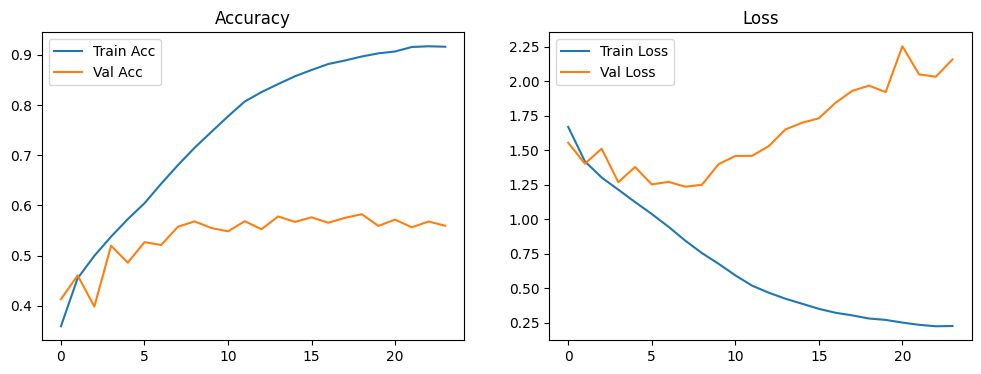

In [5]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()
